# On Recursion

## Agenda

1. Recursion
    - stopping recursion: simplification & base cases
2. Recursive "shapes":
    - Linear (single) recursion:
        - Summation
        - Factorial
        - Binary search
    - Tree (multiple) recursion: *divide and conquer*
        - Fibonacci sequence
        - Tower of Hanoi
        - Merge sort
        - Making change
3. The Call Stack and Stack Frames
    - simulating recursion
    - debugging with `pdb` and `%debug`

## 1. Recursion

Recursive functions, directly or indirectly, call themselves. 

Recursive solutions are applicable when a problem can be broken down into more easily solved sub-problems that resemble the original, and whose solutions can then be combined.

E.g., computing the combined price of a bunch of nested shopping bags of items:

In [2]:
class Bag:
    def __init__(self, price, *contents):
        self.price = price
        self.contents = contents

In [3]:
bag1 = Bag(10)

In [4]:
bag2 = Bag(5, 
           Bag(3), 
           Bag(7))

In [5]:
bag3 = Bag(5, 
           Bag(4, 
               Bag(3)), 
           Bag(2))

In [6]:
bag4 = Bag(0, 
           Bag(5), 
           Bag(10), 
           Bag(3, 
               Bag(2), 
               Bag(100)), 
           Bag(9, 
               Bag(2, 
                   Bag(25))))

In [7]:
def price(bag):
    total = bag.price
    for b in bag.contents:
        total += price(b)
    return total

In [11]:
price(bag4)

156

### Stopping recursion: simplification & base case(s)

In [12]:
import sys
sys.setrecursionlimit(500)

In [15]:
def silly_rec(n):
    print(n)
    if n <= 0:
        return
    else:
        silly_rec(n-1)

In [16]:
silly_rec(10)

10
9
8
7
6
5
4
3
2
1
0


## 2. Recursive "shapes"

### Linear recursion

#### Example: Sum (of input ≥ 0)

$sum(n) = \begin{cases}
        0 & \text{if}\ n=0 \\
        n + sum(n-1) & \text{if}\ n>0
      \end{cases}$


E.g., 

\begin{align}
sum(5) & = 5 + sum(4)\\
       & = 5 + 4 + sum(3)\\
       & = 5 + 4 + 3 + sum(2)\\
       & = 5 + 4 + 3 + 2 + sum(1)\\
       & = 5 + 4 + 3 + 2 + 1 + sum(0)\\
       & = 5 + 4 + 3 + 2 + 1 + 0
\end{align}

In [17]:
def sum(n):
    if n == 0:
        return 0
    else:
        return n + sum(n-1)

In [18]:
sum(5)

15

#### Example: Factorial

$n! = \begin{cases}
        1 & \text{if}\ n=0 \\
        n \cdot (n-1)! & \text{if}\ n>0
      \end{cases}$

In [19]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

In [20]:
factorial(5)

120

#### Example: Binary search

In [25]:
def bin_search(x, lst):
    print(lst)
    if len(lst) == 0:
        return False
    else:
        mid = len(lst) // 2
        if lst[mid] == x:
            return True
        elif lst[mid] < x:
            return bin_search(x, lst[mid+1:])
        else:
            return bin_search(x, lst[:mid])

In [26]:
bin_search(25, list(range(100)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


True

In [27]:
bin_search(99, list(range(100)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[95, 96, 97, 98, 99]
[98, 99]


True

In [28]:
bin_search(100, list(range(100)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[95, 96, 97, 98, 99]
[98, 99]
[]


False

### Tree recursion

#### Example: Fibonacci numbers

$fib(n) = \begin{cases}
            0 & \text{if}\ n=0 \\
            1 & \text{if}\ n=1 \\
            fib(n-1) + fib(n-2) & \text{otherwise}
          \end{cases}$
          
i.e., 0, 1, 1, 2, 3, 5, 8, 13, 21, ...

In [29]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [30]:
fib(20)

6765

In [31]:
[fib(i) for i in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [32]:
def fib_iter(n):
    f0=0
    f1=1
    for _ in range(n):
        f0, f1 = f1, f0+f1
    return f0

In [33]:
fib_iter(20)

6765

In [34]:
fib_iter(200)

280571172992510140037611932413038677189525

#### Example: Tower of Hanoi

Setup: three rods, with one or more discs of different sizes all stacked on one rod, smallest (top) to largest (bottom). E.g.,

         ||          ||          ||     
         ==          ||          ||     
        ====         ||          ||     
       ======        ||          ||     
    ------------------------------------
    
Goal: move all the discs, one by one, to another rod, with the rules being that (1) only smaller discs can be stacked on larger ones and (2) only the top disc in a stack can be moved to another rod.

For three discs, as shown above, we would carry out the following sequence to move the stack to the rightmost rod. The rods are abbreviated L (left), M (middle), R (right):
1. Move the small disc (0) from L to R
2. Move the medium disc (1) from L to M
3. Move 0 from R to M (R is empty)
4. Move the large disc (2) from L to R
5. Move 0 from M to L
6. Move 1 from M to R
7. Move 0 from L to R (done)

Can you come up with the sequence needed to move a stack of 4 discs from one rod to another? 5 discs? An arbitrary number of discs?

In [36]:
height = 3
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

In [37]:
towers

[[3, 2, 1], [], []]

In [38]:
from time import sleep
from IPython.display import clear_output

def display():
    clear_output(True)
    print('{:^12}'.format('||') * 3)
    for level in range(height, 0, -1):
        for t in towers:
            try:
                print('{:^12}'.format('==' * t[level-1]), end='')
            except IndexError:
                print('{:^12}'.format('||'), end='')
        print()
    print('-' * 36)
    sleep(1)

In [39]:
display()

     ||          ||          ||     
     ==          ||          ||     
    ====         ||          ||     
   ======        ||          ||     
------------------------------------


In [40]:
def move(frm, to):
    towers[to].append(towers[frm].pop(-1))
    display()

In [41]:
move(0, 2)

     ||          ||          ||     
     ||          ||          ||     
    ====         ||          ||     
   ======        ||          ==     
------------------------------------


In [44]:
def hanoi(frm, to, using, levels):
    if levels == 1:
        move(frm, to)
    else:
        hanoi(frm, using, to, levels-1)
        move(frm, to)
        hanoi(using, to, frm, levels-1)

In [46]:
height = 4
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

hanoi(0, 2, 1, height)

     ||          ||          ||     
     ||          ||          ==     
     ||          ||         ====    
     ||          ||        ======   
     ||          ||       ========  
------------------------------------


#### Example: Mergesort

In [47]:
def merge(l1, l2): # O(N), where N is the number of elements in the two lists
    merged = []
    i1 = i2 = 0
    while i1 < len(l1) or i2 < len(l2):
        if i2 == len(l2) or (i1 < len(l1) 
                             and l1[i1] < l2[i2]):
            merged.append(l1[i1])
            i1 += 1
        else:
            merged.append(l2[i2])
            i2 += 1
    return merged

In [48]:
l1 = [1, 5, 9]
l2 = [2, 6, 8, 11]
merge(l1, l2)

[1, 2, 5, 6, 8, 9, 11]

In [49]:
def mergesort(lst):
    if len(lst) <= 1:
        return lst
    else:
        mid = len(lst) // 2
        return merge(mergesort(lst[:mid]), mergesort(lst[mid:]))

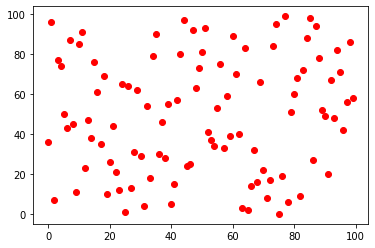

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

lst = list(range(100))
random.shuffle(lst)
plt.plot(lst, 'ro');

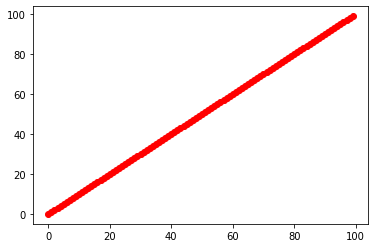

In [51]:
plt.plot(mergesort(lst), 'ro');

In [52]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break   

In [53]:
class Heap:        
    @staticmethod
    def _parent(idx):
        return (idx - 1) // 2
    
    @staticmethod
    def _left(idx):
        return idx*2 + 1

    @staticmethod
    def _right(idx):
        return idx*2 + 2

    def __init__(self, iterable=None):
        if not iterable:
            self.data = []
        else:
            self.data = list(iterable)
            last_internal_idx = Heap._parent(len(self.data)-1)
            for i in range(last_internal_idx, -1, -1):
                self._heapify(i)

    def add(self, x):
        self.data.append(x)
        idx = len(self.data) - 1
        while idx > 0:
            pidx = Heap._parent(idx)
            if self.data[pidx] < self.data[idx]:
                self.data[pidx], self.data[idx] = self.data[idx], self.data[pidx]
                idx = pidx
            else:
                break    
                                
    def max(self):
        assert len(self) > 0
        return self.data[0]

    def _heapify(self, idx):
        while idx < len(self.data):
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            maxidx = idx
            if lidx < len(self.data) and self.data[lidx] > self.data[idx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[ridx] > self.data[maxidx]:
                maxidx = ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break

    def pop_max(self):
        assert len(self) > 0
        ret = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        self._heapify(0)
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

    
def heapsort(iterable):
    h = Heap(iterable)
    ret = []
    while h:
        ret.append(h.pop_max())
    ret.reverse()
    return ret

In [54]:
import timeit
import random

insertionsort_times = []
heapsort_times = []
mergesort_times = []

for size in range(100, 3000, 100):
    insertionsort_times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))
    heapsort_times.append(timeit.timeit(stmt='heapsort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))
    mergesort_times.append(timeit.timeit(stmt='mergesort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))

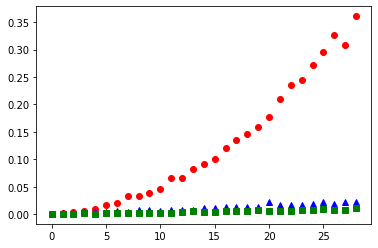

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(insertionsort_times, 'ro')
plt.plot(heapsort_times, 'b^')
plt.plot(mergesort_times, 'gs');

#### Example: Making Change

Question: how many different ways are there of making up a specified amount of money, given a list of available denominations?

E.g., how many ways of making 10 cents, given 1c, 5c, 10c, 25c coins?

In [56]:
def change(amount, denoms):
    if amount == 0:
        return 1
    elif amount < 0 or len(denoms) == 0:
        return 0
    else:
        return change(amount-denoms[0], denoms) + change(amount, denoms[1:])

In [57]:
change(5, (1, 5, 10, 25))

2

In [58]:
change(10, (1, 5, 10, 25))

4

In [59]:
change(100, (1, 5, 10, 25))

242

In [60]:
def change(amount, denoms):
    if amount == 0:
        return [()]
    elif amount < 0 or len(denoms) == 0:
        return []
    else:
        ways1 = [(denoms[0],) + w for w in change(amount-denoms[0], denoms)]
        ways2 = change(amount, denoms[1:])
        return ways1 + ways2

In [61]:
change(5, (1, 5, 10, 25))

[(1, 1, 1, 1, 1), (5,)]

In [62]:
change(10, (1, 5, 10, 25))

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 5), (5, 5), (10,)]

In [63]:
change(25, (1, 5, 10, 25))

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10),
 (1, 1, 1, 1, 1, 5, 5, 5, 5),
 (1, 1, 1, 1, 1, 5, 5, 10),
 (1, 1, 1, 1, 1, 10, 10),
 (5, 5, 5, 5, 5),
 (5, 5, 5, 10),
 (5, 10, 10),
 (25,)]

## 3. The Call Stack

Much of the power of recursion stems from the fact that each recursive call "remembers" its state -- i.e., it keeps track of:

- the values of local variables
- where it left off
- what it still has left to do (e.g., other recursive calls, in the case of tree recursion)

This is possible because each recursive function call (in fact, *all* function calls) allocate space on the **call stack** in a predictable way. Each entry on the call stack --- known as a stack frame or activation record --- is used to save the state of an executing function.

Consider the recursive Fibonacci generator function:

In [ ]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

Each time `fib` is called with $n>1$, we must keep track of two separate recursive calls (and their arguments), whose results must then be summed up before returning.

### Simulating recursion with a stack

Any recursive function can be re-implemented iteratively (i.e., using one or more loops) through the use of an explicit supporting stack data structure!

In [71]:
def fib(n):
    stack = [n]
    result = 0
    while stack:
        print(str(stack) + ' - ' + str(result))
        n = stack.pop()
        if n == 0:
            result += 0
        elif n == 1:
            result += 1
        else:
            stack.append(n-1)
            stack.append(n-2)
    return result

In [72]:
fib(5)

[5] - 0
[4, 3] - 0
[4, 2, 1] - 0
[4, 2] - 1
[4, 1, 0] - 1
[4, 1] - 1
[4] - 2
[3, 2] - 2
[3, 1, 0] - 2
[3, 1] - 2
[3] - 3
[2, 1] - 3
[2] - 4
[1, 0] - 4
[1] - 4


5

In [73]:
def price(bag):
    total = 0
    stack = [bag]
    while stack:
        b = stack.pop()
        total += b.price
        for b1 in b.contents:
            stack.append(b1)
    return total

In [74]:
bag4 = Bag(0, 
           Bag(5), 
           Bag(10), 
           Bag(3, 
               Bag(2), 
               Bag(100)), 
           Bag(9, 
               Bag(2, 
                   Bag(25))))

In [75]:
price(bag4)

156

Even though we *can* re-implement recursion using an explicit stack, doing so often leads to much less legible (and harder to maintain) code. Recursion often yields much more intuitive, elegant code!

### Examining the call stack with `pdb` and `%debug`

In [3]:
def factorial(n):
    if n <= 1:
        raise Exception('base case!')
    else:
        return n * factorial(n-1)

In [4]:
factorial(10)

Exception: base case!

In [5]:
%debug
# commands to try:
# help, where, args, p n, up, u 10, down, d 10, l, up 100, u, d (& enter to repeat)

> /tmp/ipykernel_174634/1910751206.py(3)factorial()
      1 def factorial(n):
      2     if n <= 1:
----> 3         raise Exception('base case!')
      4     else:
      5         return n * factorial(n-1)

n = 1
  /tmp/ipykernel_174634/4278114461.py(1)<module>()
----> 1 factorial(10)

  /tmp/ipykernel_174634/1910751206.py(5)factorial()
      1 def factorial(n):
      2     if n <= 1:
      3         raise Exception('base case!')
      4     else:
----> 5         return n * factorial(n-1)

  /tmp/ipykernel_174634/1910751206.py(5)factorial()
      1 def factorial(n):
      2     if n <= 1:
      3         raise Exception('base case!')
      4     else:
----> 5         return n * factorial(n-1)

  /tmp/ipykernel_174634/1910751206.py(5)factorial()
      1 def factorial(n):
      2     if n <= 1:
      3         raise Exception('base case!')
      4     else:
----> 5         return n * factorial(n-1)

  /tmp/ipykernel_174634/1910751206.py(5)factorial()
      1 def factorial(n):
      2   

In [1]:
def bin_search(x, lst):
    if len(lst) == 0:
        return False
    else:
        mid = len(lst) // 2
        if lst[mid] < x:
            return bin_search(x, lst[mid+1:])
        elif lst[mid] > x:
            return bin_search(x, lst[:mid])
        else:
            import pdb ; pdb.set_trace() # <-- start debugging here
            return True    

In [2]:
bin_search(20, list(range(100)))

> /tmp/ipykernel_175111/3838317576.py(12)bin_search()
      8         elif lst[mid] > x:
      9             return bin_search(x, lst[:mid])
     10         else:
     11             import pdb ; pdb.set_trace() # <-- start debugging here
---> 12             return True

*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
*** NameError: name 'n' is not defined
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


True